In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

In [3]:
df = pd.read_csv("SDOH_Filtered_Data.csv")

In [4]:
df.shape

(32060, 21)

In [5]:
df[df["COUNTY"] == "Santa Clara County"]

,YEAR,STATE,COUNTY,COUNTYFIPS,STATEFIPS,CDCA_HEART_DTH_RATE_ABOVE35,ACS_MEDIAN_HH_INC,ACS_PCT_UNEMPLOY,ACS_PCT_OWNER_HU_COST_30PCT,ACS_PCT_HH_PUB_ASSIST,...,ACS_PCT_GRADUATE_DGR,ACS_PCT_HS_GRADUATE,ACS_PCT_POSTHS_ED,AHRF_TOT_HOSPS,AHRF_TOT_NH_BED_STNGH,AHRF_TOT_OUTPAT_VST_STNGH,AHRF_TOT_ST_G_HOSP_ADMS,AHRF_TOT_ST_G_HOSP_BED,AHRF_TOT_ST_N_G_HOSP,AHRF_TOT_STNG_LT_HOSP_ADMS
220,2009,California,Santa Clara County,6085,6,343.9,85569.0,7.00,41.13,3.63,...,18.69,17.13,68.70,11.0,0.0,139100.0,160178.0,3655.0,1.0,12902.0
3426,2010,California,Santa Clara County,6085,6,333.3,86850.0,7.81,41.13,4.21,...,19.59,16.47,69.85,11.0,0.0,140143.0,152783.0,3678.0,1.0,13209.0
6632,2011,California,Santa Clara County,6085,6,318.7,89064.0,8.63,40.12,4.72,...,19.94,16.24,70.25,11.0,0.0,143179.0,144659.0,2829.0,1.0,19301.0
9838,2012,California,Santa Clara County,6085,6,311.5,90747.0,9.30,38.48,5.33,...,20.23,15.71,70.79,11.0,0.0,153815.0,144618.0,3453.0,1.0,12681.0
13044,2013,California,Santa Clara County,6085,6,303.1,91702.0,9.69,36.30,5.90,...,20.72,15.53,70.99,11.0,0.0,297430.0,155652.0,3443.0,1.0,12866.0
16250,2014,California,Santa Clara County,6085,6,300.4,93854.0,8.82,34.15,6.20,...,21.26,15.45,71.35,11.0,0.0,202523.0,150172.0,3415.0,1.0,13028.0
19456,2015,California,Santa Clara County,6085,6,299.8,96310.0,7.68,32.18,6.19,...,21.86,15.17,71.81,11.0,0.0,235637.0,154827.0,3640.0,1.0,13644.0
22662,2016,California,Santa Clara County,6085,6,300.7,101173.0,6.57,30.59,6.09,...,22.43,14.77,72.30,12.0,0.0,123416.0,158215.0,3640.0,2.0,13763.0
25868,2017,California,Santa Clara County,6085,6,303.7,106761.0,5.68,29.66,5.89,...,23.18,14.78,72.77,12.0,0.0,93685.0,162928.0,3641.0,2.0,14641.0
29074,2019,California,Santa Clara County,6085,6,289.8,124055.0,4.28,28.07,5.33,...,24.71,14.10,74.28,12.0,0.0,109853.0,153538.0,3611.0,2.0,15954.0


In [6]:
df_counties = {}
for county in df["COUNTY"].unique():
    df_counties[county] = df[df["COUNTY"] == county]

In [7]:
for county in df_counties:
    df_counties[county] = df_counties[county].set_index("YEAR")
    df_counties[county] = df_counties[county].drop("STATE", axis = 1)
    df_counties[county] = df_counties[county].drop("COUNTY", axis = 1)

In [8]:
df = df_counties["Santa Clara County"]

In [9]:
df.shape

(10, 18)

In [10]:
df

,COUNTYFIPS,STATEFIPS,CDCA_HEART_DTH_RATE_ABOVE35,ACS_MEDIAN_HH_INC,ACS_PCT_UNEMPLOY,ACS_PCT_OWNER_HU_COST_30PCT,ACS_PCT_HH_PUB_ASSIST,ACS_PCT_LT_HS,ACS_PCT_GRADUATE_DGR,ACS_PCT_HS_GRADUATE,ACS_PCT_POSTHS_ED,AHRF_TOT_HOSPS,AHRF_TOT_NH_BED_STNGH,AHRF_TOT_OUTPAT_VST_STNGH,AHRF_TOT_ST_G_HOSP_ADMS,AHRF_TOT_ST_G_HOSP_BED,AHRF_TOT_ST_N_G_HOSP,AHRF_TOT_STNG_LT_HOSP_ADMS
YEAR,,,,,,,,,,,,,,,,,,
2009,6085,6,343.9,85569.0,7.00,41.13,3.63,14.17,18.69,17.13,68.70,11.0,0.0,139100.0,160178.0,3655.0,1.0,12902.0
2010,6085,6,333.3,86850.0,7.81,41.13,4.21,13.68,19.59,16.47,69.85,11.0,0.0,140143.0,152783.0,3678.0,1.0,13209.0
2011,6085,6,318.7,89064.0,8.63,40.12,4.72,13.52,19.94,16.24,70.25,11.0,0.0,143179.0,144659.0,2829.0,1.0,19301.0
2012,6085,6,311.5,90747.0,9.30,38.48,5.33,13.50,20.23,15.71,70.79,11.0,0.0,153815.0,144618.0,3453.0,1.0,12681.0
2013,6085,6,303.1,91702.0,9.69,36.30,5.90,13.48,20.72,15.53,70.99,11.0,0.0,297430.0,155652.0,3443.0,1.0,12866.0
2014,6085,6,300.4,93854.0,8.82,34.15,6.20,13.20,21.26,15.45,71.35,11.0,0.0,202523.0,150172.0,3415.0,1.0,13028.0
2015,6085,6,299.8,96310.0,7.68,32.18,6.19,13.02,21.86,15.17,71.81,11.0,0.0,235637.0,154827.0,3640.0,1.0,13644.0
2016,6085,6,300.7,101173.0,6.57,30.59,6.09,12.93,22.43,14.77,72.30,12.0,0.0,123416.0,158215.0,3640.0,2.0,13763.0
2017,6085,6,303.7,106761.0,5.68,29.66,5.89,12.45,23.18,14.78,72.77,12.0,0.0,93685.0,162928.0,3641.0,2.0,14641.0


In [11]:
years = np.array([2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2019])

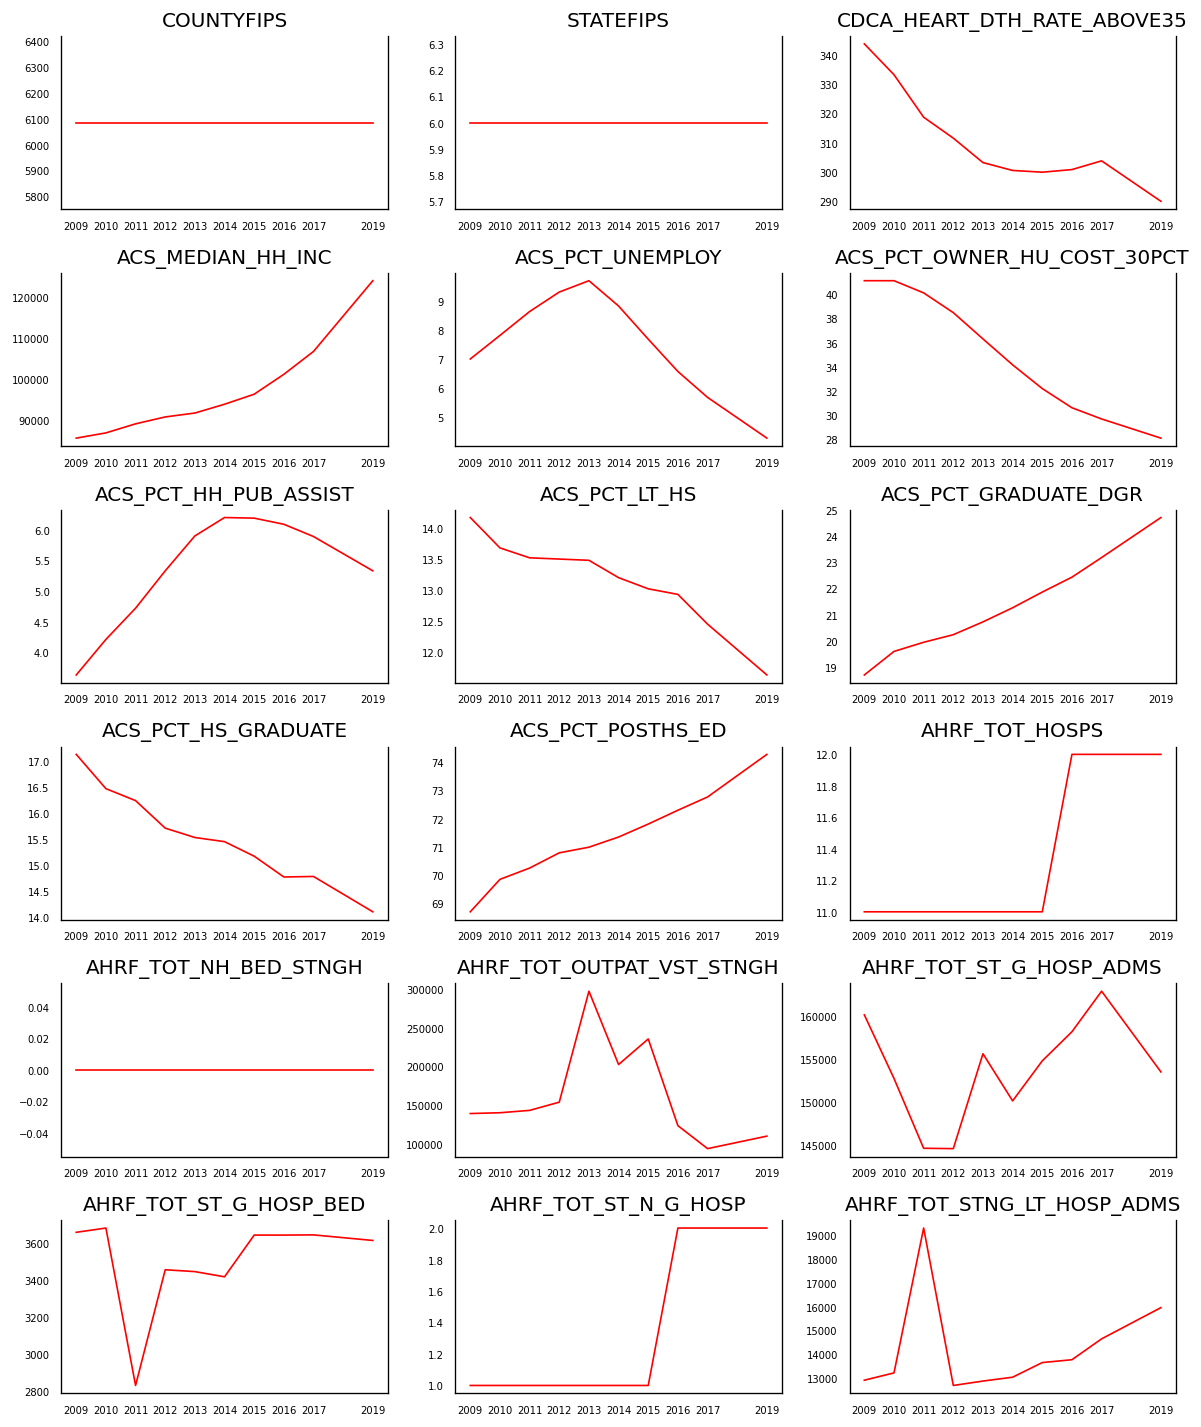

In [12]:
fig, axes = plt.subplots(nrows=6, ncols=3, dpi=120, figsize=(10, 12))
for i, ax in enumerate(axes.flatten()):
    data = df[df.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    ax.set_title(df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)
    ax.set_xticks(years)

plt.tight_layout();

In [13]:
df2 = df_counties["Hinds County"]

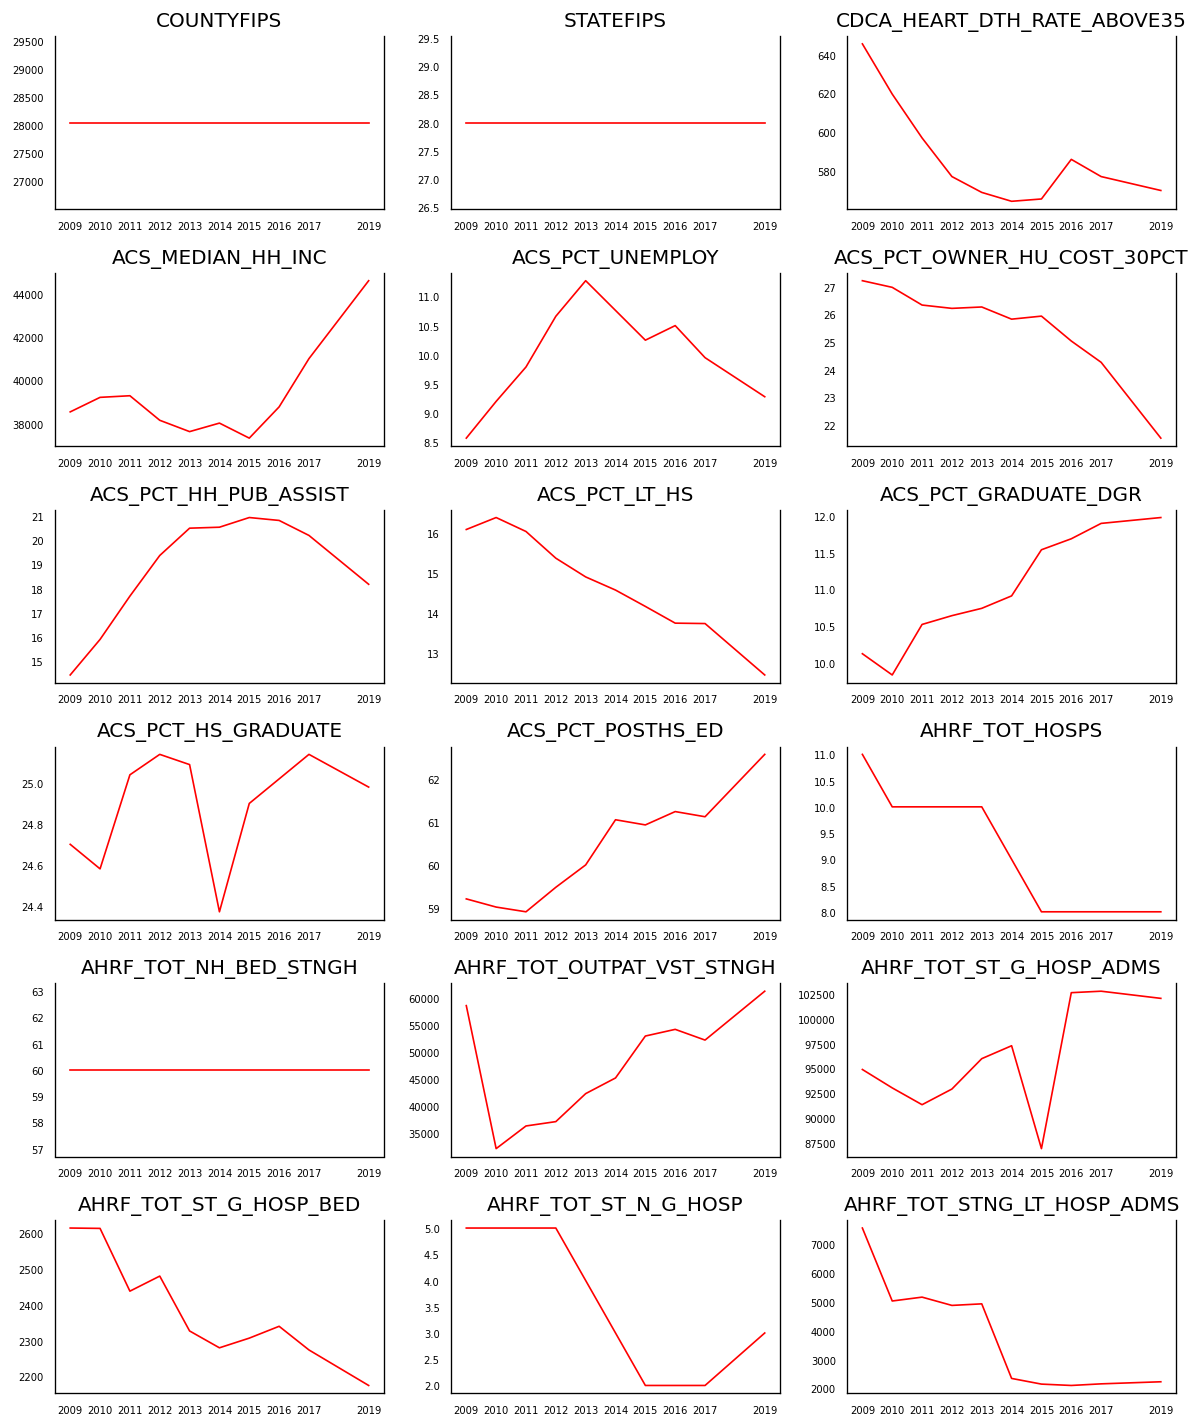

In [14]:
fig, axes = plt.subplots(nrows=6, ncols=3, dpi=120, figsize=(10, 12))
for i, ax in enumerate(axes.flatten()):
    data = df2[df2.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    ax.set_title(df2.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)
    ax.set_xticks(years)

plt.tight_layout();

In [19]:
df = df.drop("AHRF_TOT_NH_BED_STNGH", axis = 1)
# df = df.drop("STATEFIPS", axis = 1)
from statsmodels.tsa.stattools import grangercausalitytests
maxlag = 2
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):
    daf = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in daf.columns:
        for r in daf.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            daf.loc[r, c] = min_p_value
    daf.columns = [var + '_x' for var in variables]
    daf.index = [var + '_y' for var in variables]
    return daf
grangers_causation_matrix(df, variables = df.columns)

,CDCA_HEART_DTH_RATE_ABOVE35_x,ACS_MEDIAN_HH_INC_x,ACS_PCT_UNEMPLOY_x,ACS_PCT_OWNER_HU_COST_30PCT_x,ACS_PCT_HH_PUB_ASSIST_x,ACS_PCT_LT_HS_x,ACS_PCT_GRADUATE_DGR_x,ACS_PCT_HS_GRADUATE_x,ACS_PCT_POSTHS_ED_x,AHRF_TOT_HOSPS_x,AHRF_TOT_OUTPAT_VST_STNGH_x,AHRF_TOT_ST_G_HOSP_ADMS_x,AHRF_TOT_ST_G_HOSP_BED_x,AHRF_TOT_ST_N_G_HOSP_x,AHRF_TOT_STNG_LT_HOSP_ADMS_x
CDCA_HEART_DTH_RATE_ABOVE35_y,1.0000,0.0010,0.0233,0.0004,0.1298,0.0177,0.1546,0.0483,0.0000,0.0000,0.0172,0.7582,0.5297,0.0000,0.6076
ACS_MEDIAN_HH_INC_y,0.0000,1.0000,0.0000,0.0000,0.0000,0.0027,0.0000,0.0000,0.0000,0.0000,0.0027,0.1228,0.6484,0.0000,0.6342
ACS_PCT_UNEMPLOY_y,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0002,0.0130,0.0002,0.5457,0.0002,0.4881
ACS_PCT_OWNER_HU_COST_30PCT_y,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0004,0.0000,0.0851,0.0005,0.0702,0.0000,0.4760
ACS_PCT_HH_PUB_ASSIST_y,0.1539,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0059,0.0003,0.0003,0.0177,0.0000,0.0623,0.0003,0.1795
ACS_PCT_LT_HS_y,0.0323,0.0000,0.0008,0.2903,0.0884,1.0000,0.3027,0.3383,0.3292,0.0003,0.1810,0.0000,0.1010,0.0003,0.4940
ACS_PCT_GRADUATE_DGR_y,0.0028,0.0000,0.0003,0.0000,0.0000,0.0609,1.0000,0.0043,0.0016,0.0000,0.0243,0.0009,0.0314,0.0000,0.1486
ACS_PCT_HS_GRADUATE_y,0.0396,0.0002,0.0128,0.0259,0.0029,0.0000,0.0000,1.0000,0.0000,0.0089,0.0102,0.2511,0.8478,0.0089,0.2101
ACS_PCT_POSTHS_ED_y,0.0000,0.0000,0.0002,0.0000,0.0106,0.0000,0.0000,0.0000,1.0000,0.0000,0.0543,0.0018,0.1158,0.0000,0.1072
AHRF_TOT_HOSPS_y,0.0548,0.0079,0.0007,0.0000,0.0000,0.0025,0.0045,0.0540,0.0013,1.0000,0.2696,0.3508,0.3572,1.0000,0.8046


In [18]:
df

,CDCA_HEART_DTH_RATE_ABOVE35,ACS_MEDIAN_HH_INC,ACS_PCT_UNEMPLOY,ACS_PCT_OWNER_HU_COST_30PCT,ACS_PCT_HH_PUB_ASSIST,ACS_PCT_LT_HS,ACS_PCT_GRADUATE_DGR,ACS_PCT_HS_GRADUATE,ACS_PCT_POSTHS_ED,AHRF_TOT_HOSPS,AHRF_TOT_NH_BED_STNGH,AHRF_TOT_OUTPAT_VST_STNGH,AHRF_TOT_ST_G_HOSP_ADMS,AHRF_TOT_ST_G_HOSP_BED,AHRF_TOT_ST_N_G_HOSP,AHRF_TOT_STNG_LT_HOSP_ADMS
YEAR,,,,,,,,,,,,,,,,
2009,343.9,85569.0,7.00,41.13,3.63,14.17,18.69,17.13,68.70,11.0,0.0,139100.0,160178.0,3655.0,1.0,12902.0
2010,333.3,86850.0,7.81,41.13,4.21,13.68,19.59,16.47,69.85,11.0,0.0,140143.0,152783.0,3678.0,1.0,13209.0
2011,318.7,89064.0,8.63,40.12,4.72,13.52,19.94,16.24,70.25,11.0,0.0,143179.0,144659.0,2829.0,1.0,19301.0
2012,311.5,90747.0,9.30,38.48,5.33,13.50,20.23,15.71,70.79,11.0,0.0,153815.0,144618.0,3453.0,1.0,12681.0
2013,303.1,91702.0,9.69,36.30,5.90,13.48,20.72,15.53,70.99,11.0,0.0,297430.0,155652.0,3443.0,1.0,12866.0
2014,300.4,93854.0,8.82,34.15,6.20,13.20,21.26,15.45,71.35,11.0,0.0,202523.0,150172.0,3415.0,1.0,13028.0
2015,299.8,96310.0,7.68,32.18,6.19,13.02,21.86,15.17,71.81,11.0,0.0,235637.0,154827.0,3640.0,1.0,13644.0
2016,300.7,101173.0,6.57,30.59,6.09,12.93,22.43,14.77,72.30,12.0,0.0,123416.0,158215.0,3640.0,2.0,13763.0
2017,303.7,106761.0,5.68,29.66,5.89,12.45,23.18,14.78,72.77,12.0,0.0,93685.0,162928.0,3641.0,2.0,14641.0


In [20]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

In [21]:
def cointegration_test(df, alpha=0.05): 
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)
cointegration_test(df)

C:\Users\anush\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:648: HypothesisTestWarning: Critical values are only available for time series with 12 variables at most.
  warnings.warn(


LinAlgError: Matrix is not positive definite

In [79]:
nobs = 4
df_train, df_test = df[0:-nobs], df[-nobs:]
print(df_train.shape)
print(df_test.shape)

(6, 15)
(4, 15)


In [80]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
        return 1
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")
        return 0

In [81]:
num_stationary = 0
for name, column in df_train.items():
    num_stationary += adfuller_test(column, name=column.name)
    print('\n')
print(num_stationary)

    Augmented Dickey-Fuller Test on "CDCA_HEART_DTH_RATE_ABOVE35" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -6.7523
 No. Lags Chosen       = 1
 Critical value 1%     = -7.355
 Critical value 5%     = -4.474
 Critical value 10%    = -3.127
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "ACS_MEDIAN_HH_INC" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -0.6852
 No. Lags Chosen       = 1
 Critical value 1%     = -7.355
 Critical value 5%     = -4.474
 Critical value 10%    = -3.127
 => P-Value = 0.8505. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "ACS_PCT_UNEMPLOY" 
    -----------------------------------------------
 Null Hypot

C:\Users\anush\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\regression\linear_model.py:940: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
C:\Users\anush\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\regression\linear_model.py:940: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2


In [100]:
num_stationary = 0
df_differenced = df_train.diff().dropna()
for name, column in df_differenced.iteritems():
    num_stationary += adfuller_test(column, name=column.name)
    print('\n')
print(num_stationary)

    Augmented Dickey-Fuller Test on "CDCA_HEART_DTH_RATE_ABOVE35" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -0.7263
 No. Lags Chosen       = 0
 Critical value 1%     = -7.355
 Critical value 5%     = -4.474
 Critical value 10%    = -3.127
 => P-Value = 0.8398. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "ACS_MEDIAN_HH_INC" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.4883
 No. Lags Chosen       = 0
 Critical value 1%     = -7.355
 Critical value 5%     = -4.474
 Critical value 10%    = -3.127
 => P-Value = 0.1184. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "ACS_PCT_UNEMPLOY" 
    ----------------------------------

C:\Users\anush\AppData\Local\Temp\ipykernel_3184\3944797506.py:3: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, column in df_differenced.iteritems():
C:\Users\anush\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\regression\linear_model.py:940: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
C:\Users\anush\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\regression\linear_model.py:940: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2


In [83]:
num_stationary = 0
df_differenced = df_differenced.diff().dropna()
for name, column in df_differenced.iteritems():
    num_stationary += adfuller_test(column, name=column.name)
    print('\n')
print(num_stationary)

    Augmented Dickey-Fuller Test on "CDCA_HEART_DTH_RATE_ABOVE35" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -45.9301
 No. Lags Chosen       = 0
 Critical value 1%     = -10.417
 Critical value 5%     = -5.778
 Critical value 10%    = -3.392
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "ACS_MEDIAN_HH_INC" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.5969
 No. Lags Chosen       = 0
 Critical value 1%     = -10.417
 Critical value 5%     = -5.778
 Critical value 10%    = -3.392
 => P-Value = 0.4852. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "ACS_PCT_UNEMPLOY" 
    -----------------------------------------------
 Null Hy

C:\Users\anush\AppData\Local\Temp\ipykernel_3184\3180630116.py:3: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, column in df_differenced.iteritems():
C:\Users\anush\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\regression\linear_model.py:940: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
C:\Users\anush\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\regression\linear_model.py:940: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2


In [99]:
df_train

,CDCA_HEART_DTH_RATE_ABOVE35,ACS_MEDIAN_HH_INC,ACS_PCT_UNEMPLOY,ACS_PCT_OWNER_HU_COST_30PCT,ACS_PCT_HH_PUB_ASSIST,ACS_PCT_LT_HS,ACS_PCT_GRADUATE_DGR,ACS_PCT_HS_GRADUATE,ACS_PCT_POSTHS_ED,AHRF_TOT_HOSPS,AHRF_TOT_OUTPAT_VST_STNGH,AHRF_TOT_ST_G_HOSP_ADMS,AHRF_TOT_ST_G_HOSP_BED,AHRF_TOT_ST_N_G_HOSP,AHRF_TOT_STNG_LT_HOSP_ADMS
YEAR,,,,,,,,,,,,,,,
2009,343.9,85569.0,7.00,41.13,3.63,14.17,18.69,17.13,68.70,11.0,139100.0,160178.0,3655.0,1.0,12902.0
2010,333.3,86850.0,7.81,41.13,4.21,13.68,19.59,16.47,69.85,11.0,140143.0,152783.0,3678.0,1.0,13209.0
2011,318.7,89064.0,8.63,40.12,4.72,13.52,19.94,16.24,70.25,11.0,143179.0,144659.0,2829.0,1.0,19301.0
2012,311.5,90747.0,9.30,38.48,5.33,13.50,20.23,15.71,70.79,11.0,153815.0,144618.0,3453.0,1.0,12681.0
2013,303.1,91702.0,9.69,36.30,5.90,13.48,20.72,15.53,70.99,11.0,297430.0,155652.0,3443.0,1.0,12866.0
2014,300.4,93854.0,8.82,34.15,6.20,13.20,21.26,15.45,71.35,11.0,202523.0,150172.0,3415.0,1.0,13028.0


In [97]:
df_differenced

,CDCA_HEART_DTH_RATE_ABOVE35,ACS_MEDIAN_HH_INC,ACS_PCT_UNEMPLOY,ACS_PCT_OWNER_HU_COST_30PCT,ACS_PCT_HH_PUB_ASSIST,ACS_PCT_LT_HS,ACS_PCT_GRADUATE_DGR,ACS_PCT_HS_GRADUATE,ACS_PCT_POSTHS_ED,AHRF_TOT_HOSPS,AHRF_TOT_OUTPAT_VST_STNGH,AHRF_TOT_ST_G_HOSP_ADMS,AHRF_TOT_ST_G_HOSP_BED,AHRF_TOT_ST_N_G_HOSP,AHRF_TOT_STNG_LT_HOSP_ADMS
YEAR,,,,,,,,,,,,,,,
2011,-4.0,933.0,0.01,-1.01,-0.07,0.33,-0.55,0.43,-0.75,0.0,1993.0,-729.0,-872.0,0.0,5785.0
2012,7.4,-531.0,-0.15,-0.63,0.10,0.14,-0.06,-0.30,0.14,0.0,7600.0,8083.0,1473.0,0.0,-12712.0
2013,-1.2,-728.0,-0.28,-0.54,-0.04,0.00,0.20,0.35,-0.34,0.0,132979.0,11075.0,-634.0,0.0,6805.0
2014,5.7,1197.0,-1.26,0.03,-0.27,-0.26,0.05,0.10,0.16,0.0,-238522.0,-16514.0,-18.0,0.0,-23.0


In [101]:
model = VAR(df_differenced)
for i in [1]:
    result = model.fit(i)
    print('Lag Order =', i)
    print (result)
#     print('AIC : ', result.aic)
#     print('BIC : ', result.bic)
#     print('FPE : ', result.fpe)
#     print('HQIC: ', result.hqic, '\n')

Lag Order = 1


C:\Users\anush\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [102]:
result.summary()

LinAlgError: 6-th leading minor of the array is not positive definite